## Isolation Forest Anomaly Detection

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic 2D numerical healthcare-like data
# Features: Age, Blood Sugar Level
X, _ = make_blobs(n_samples=200, centers=[[45, 90], [60, 150]], cluster_std=5, random_state=42)

# Add some anomalies
rng = np.random.RandomState(42)
n_outliers = 10
X_outliers = rng.uniform(low=[20, 50], high=[80, 200], size=(n_outliers, 2))

# Combine data
X = np.vstack([X, X_outliers])

# Create DataFrame
df = pd.DataFrame(X, columns=["Age", "Blood_Sugar"])
print(df.head())

         Age  Blood_Sugar
0  52.013972    82.990745
1  44.038195    91.507737
2  52.328244    88.871118
3  61.613593   145.863845
4  46.070469    83.771306


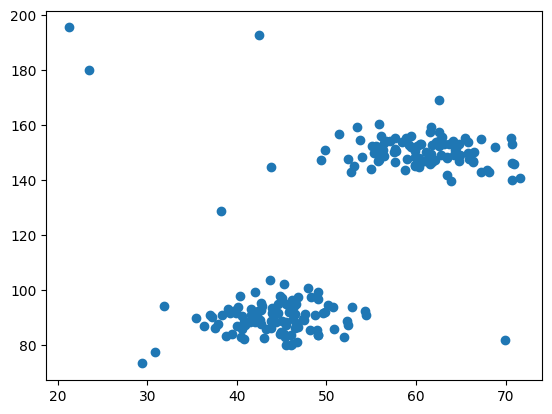

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [6]:
predictions

array([-1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1])

In [7]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  0,   2,  15,  22,  31,  38,  52,  57,  62,  67,  71,  73,  76,
         87,  94, 109, 110, 116, 117, 119, 120, 122, 136, 146, 151, 155,
        159, 161, 162, 163, 167, 168, 169, 178, 200, 201, 202, 203, 205,
        206, 207, 208]),)

In [8]:
x=df.values

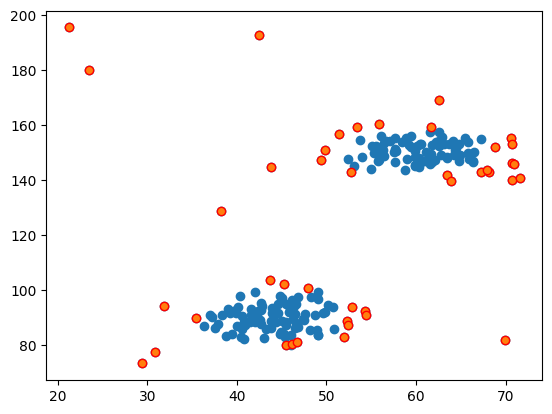

In [9]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")